# Alexnet

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as K
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
# from tensorflow.keras import datasets, layers, models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2024-11-20 22:10:07.122639: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-20 22:10:07.133551: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732158607.144402    6569 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732158607.147537    6569 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 22:10:07.159312: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Preparation for trainning - Train Split

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset of Breast mammography images with Masses/Image After Data Augmentation, Image Size 227x227/',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(227, 227),
    batch_size=32,
)

Found 7632 files belonging to 8 classes.
Using 6106 files for training.


I0000 00:00:1732158610.545107    6569 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1756 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
classes_ = train_ds.class_names
len(classes_)

8

In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset of Breast mammography images with Masses/Image After Data Augmentation, Image Size 227x227/',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(227, 227),
    batch_size=32,
)

Found 7632 files belonging to 8 classes.
Using 1526 files for validation.


def normalize(image, label):
  return tf.cast(image/255., tf.float32), label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

train_ds, val_ds

# Preparation for trainning - Test Split

In [6]:
train_ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset of Breast mammography images with Masses/Image Before Data Augmentation, Image Size 227x227/',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(227, 227),
    batch_size=32,
)

Found 212 files belonging to 8 classes.
Using 170 files for training.


In [7]:
val_ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset of Breast mammography images with Masses/Image Before Data Augmentation, Image Size 227x227/',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(227, 227),
    batch_size=32,
)

Found 212 files belonging to 8 classes.
Using 42 files for validation.


In [8]:
def normalize(image, label):
  return tf.cast(image/255., tf.float32), label

train_ds_test = train_ds_test.map(normalize)
val_ds_test = val_ds_test.map(normalize)

train_ds_test, val_ds_test

(<_MapDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

# Training

In [9]:
model = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1000, activation= 'relu'),
    Dense(8, activation='softmax')
])

/home/viviane/apps/anaconda3/envs/pro1-cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [11]:
epochs = 70
history = model.fit(train_ds,
                    validation_data=val_ds,
                    batch_size=128,
                    epochs=epochs)

Epoch 1/70


I0000 00:00:1732158613.334417    6669 service.cc:148] XLA service 0x7f5300014130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732158613.334495    6669 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-11-20 22:10:13.362720: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732158613.980551    6669 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-20 22:10:15.042445: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_600', 236 bytes spill stores, 236 bytes spill loads

2024-11-20 22:10:15.193076: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_

  1/191 ━━━━━━━━━━━━━━━━━━━━ 31:26 10s/step - accuracy: 0.0000e+00 - loss: 6.4025

I0000 00:00:1732158621.938441    6669 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


189/191 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2621 - loss: 15.3010

2024-11-20 22:10:32.884551: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_600', 244 bytes spill stores, 244 bytes spill loads

2024-11-20 22:10:33.097159: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_944', 32 bytes spill stores, 32 bytes spill loads

2024-11-20 22:10:33.242585: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_600', 152 bytes spill stores, 152 bytes spill loads

2024-11-20 22:10:33.677868: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_944', 32 bytes spill stores, 32 bytes spill loads

2024-11-20 22:10:34.062182: I external/local_xla/xla/stream_

191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.2624 - loss: 15.1986

2024-11-20 22:10:40.763265: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 730.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-20 22:10:43.203143: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_106', 88 bytes spill stores, 88 bytes spill loads

2024-11-20 22:10:43.282071: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_113', 84 bytes spill stores, 84 bytes spill loads

2024-11-20 22:10:43.311774: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_106', 244 bytes spill stores, 24

191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 122ms/step - accuracy: 0.2625 - loss: 15.1482 - val_accuracy: 0.3028 - val_loss: 1.7606
Epoch 2/70
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.2914 - loss: 1.7528 - val_accuracy: 0.3028 - val_loss: 1.7714
Epoch 3/70
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.2907 - loss: 1.7644 - val_accuracy: 0.3028 - val_loss: 1.7616
Epoch 4/70
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.2918 - loss: 1.7603 - val_accuracy: 0.3028 - val_loss: 1.7625
Epoch 5/70
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.2887 - loss: 1.7529 - val_accuracy: 0.3028 - val_loss: 1.7627
Epoch 6/70
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.2975 - loss: 1.7557 - val_accuracy: 0.3028 - val_loss: 1.7589
Epoch 7/70
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.3017 - loss: 1.7575 - val_accuracy: 0.3028 - val_loss: 1.7581
Epoch 8/70
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.3014 - loss: 1.7484 - val_accur

# Evaluating

In [12]:
history.history

{'accuracy': [0.2897150218486786,
  0.2921716272830963,
  0.29446446895599365,
  0.2923354208469391,
  0.28807729482650757,
  0.29266294836997986,
  0.2951195538043976,
  0.2959384322166443,
  0.2924991846084595,
  0.2943006753921509,
  0.2967572808265686,
  0.29184409976005554,
  0.29282674193382263,
  0.2911889851093292,
  0.29528331756591797,
  0.2947919964790344,
  0.2924991846084595,
  0.2920078635215759,
  0.2943006753921509,
  0.29380935430526733,
  0.29986897110939026,
  0.29364559054374695,
  0.2947919964790344,
  0.2933180332183838,
  0.2985588014125824,
  0.29544711112976074,
  0.29462823271751404,
  0.2965935170650482,
  0.2983950078487396,
  0.2957746386528015,
  0.30003276467323303,
  0.2939731478691101,
  0.30167049169540405,
  0.2967572808265686,
  0.30167049169540405,
  0.30167049169540405,
  0.2977399230003357,
  0.29528331756591797,
  0.30167049169540405,
  0.2969210743904114,
  0.292990505695343,
  0.29561087489128113,
  0.29708483815193176,
  0.2949557900428772,
  

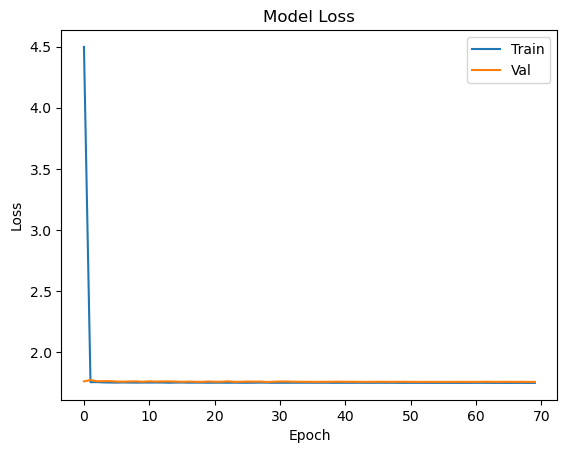

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

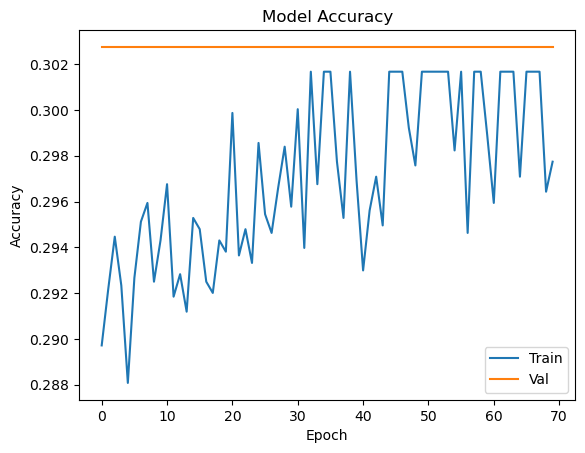

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

48/48 - 1s - 24ms/step - accuracy: 0.3028 - loss: 1.7564


In [16]:
print(test_acc)

0.302752286195755


In [17]:
predictions = model.predict(train_ds_test)
val_pred = np.argmax(predictions, axis=1)

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 

2024-11-20 22:23:21.689826: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_96_0', 260 bytes spill stores, 260 bytes spill loads

2024-11-20 22:23:21.723906: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_89_0', 248 bytes spill stores, 248 bytes spill loads

2024-11-20 22:23:21.793516: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_103', 24 bytes spill stores, 24 bytes spill loads



6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 549ms/step


In [18]:
y_true = []
y_pred = []
for images, labels in val_ds_test:
  # Make predictions on the batch
  batch_pred = model.predict(images)
  y_pred.extend(list(batch_pred.argmax(axis=1)))  # Predicted labels
  y_true.extend(list(labels.numpy()))  # True labels from the batch

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


2024-11-20 22:23:24.466146: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


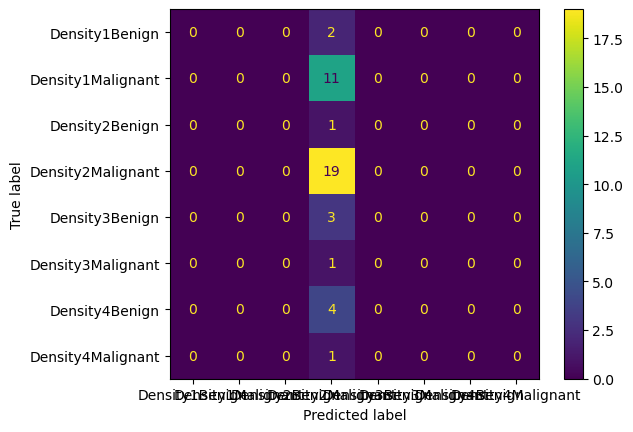

In [19]:
disp = ConfusionMatrixDisplay(cm, display_labels=classes_,)
disp.plot()

In [20]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         1
           3       0.45      1.00      0.62        19
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1

    accuracy                           0.45        42
   macro avg       0.06      0.12      0.08        42
weighted avg       0.20      0.45      0.28        42



/home/viviane/apps/anaconda3/envs/pro1-cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/viviane/apps/anaconda3/envs/pro1-cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/viviane/apps/anaconda3/envs/pro1-cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

# Save

In [21]:
# model.save('models/breast_cancer_classification-alexnet.h5')